In [67]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# Dependencies and Setup
import matplotlib.pyplot as plt

import pandas as pd

import scipy.stats as st

import numpy as np

import os

from scipy.stats import linregress

# File to Load 
file_to_load = "combined.csv"

# Read the File and store into Pandas data frame
combined_data = pd.read_csv(file_to_load)
combined_data

,urbanization_rate_country,urbanization_rate,suicide_rate,meat_consumption,gdp_per_capita,fertility,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Monaco,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nauru,100.0,NaN,NaN,9073.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Singapore,100.0,7.9,71.1,105689.0,1.1,6.3771,11.395521,0.910269,76.804581,0.926645,0.029879,0.109784
3,Anguilla,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bermuda,100.0,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,NaN,NaN,NaN,NaN,NaN,NaN,4.7506,7.321815,0.693169,55.012016,0.733163,0.343199,0.690718
243,NaN,NaN,NaN,NaN,NaN,NaN,6.3252,9.204430,0.820727,63.885555,0.861536,0.190934,0.922328
244,NaN,NaN,NaN,NaN,NaN,NaN,4.3110,6.694256,0.672159,52.900002,0.700794,0.083638,0.809404
245,NaN,NaN,NaN,NaN,NaN,NaN,4.3081,9.162674,0.770290,51.188236,0.646822,-0.199201,0.708263


In [68]:
#Remove NAN values
combined_data.dropna(how='any', inplace=True)
#Update some column names
combined_data.rename(columns={'urbanization_rate_country':'Country'}, inplace=True)
combined_data.rename(columns={'ladder_score':'happiness_score'}, inplace=True)
#show df
combined_data

,Country,urbanization_rate,suicide_rate,meat_consumption,gdp_per_capita,fertility,happiness_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
2,Singapore,100.0,7.9,71.1,105689.0,1.1,6.3771,11.395521,0.910269,76.804581,0.926645,0.029879,0.109784
11,Belgium,98.1,15.7,86.1,50904.0,1.6,6.8635,10.673639,0.911633,72.001648,0.813582,-0.078691,0.612298
13,Uruguay,95.5,16.5,98.6,24516.0,2.0,6.4401,9.948193,0.922811,69.002548,0.892395,-0.101103,0.635994
15,Malta,94.7,6.5,86.9,49589.0,1.2,6.7728,10.533838,0.930380,72.199997,0.924911,0.214966,0.658547
16,Iceland,93.9,13.3,84.8,56974.0,1.7,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Sri Lanka,18.7,14.2,6.6,14509.0,2.2,4.3270,9.389970,0.825374,67.200066,0.837634,0.081130,0.859002
210,Rwanda,17.4,11.0,4.4,2642.0,4.0,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
211,Malawi,17.4,7.8,5.1,1292.0,4.2,3.5380,7.062226,0.544007,57.592888,0.803223,0.021433,0.731701
212,Niger,16.6,9.0,11.2,1152.0,5.3,4.9096,6.842167,0.617435,53.500095,0.759772,0.013861,0.722530


In [69]:
#round values in some columns
combined_data['happiness_score'] = (combined_data['happiness_score'].round(2))
combined_data['logged_gdp_per_capita'] = (combined_data['logged_gdp_per_capita'].round(2))
combined_data['social_support'] = (combined_data['social_support'].round(2))
combined_data['healthy_life_expectancy'] = (combined_data['healthy_life_expectancy'].round(2))
combined_data['freedom_to_make_life_choices'] = (combined_data['freedom_to_make_life_choices'].round(2))
combined_data['generosity'] = (combined_data['generosity'].round(2))
combined_data['perceptions_of_corruption'] = (combined_data['perceptions_of_corruption'].round(2))
combined_data

,Country,urbanization_rate,suicide_rate,meat_consumption,gdp_per_capita,fertility,happiness_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
2,Singapore,100.0,7.9,71.1,105689.0,1.1,6.38,11.40,0.91,76.80,0.93,0.03,0.11
11,Belgium,98.1,15.7,86.1,50904.0,1.6,6.86,10.67,0.91,72.00,0.81,-0.08,0.61
13,Uruguay,95.5,16.5,98.6,24516.0,2.0,6.44,9.95,0.92,69.00,0.89,-0.10,0.64
15,Malta,94.7,6.5,86.9,49589.0,1.2,6.77,10.53,0.93,72.20,0.92,0.21,0.66
16,Iceland,93.9,13.3,84.8,56974.0,1.7,7.50,10.77,0.97,73.00,0.95,0.25,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Sri Lanka,18.7,14.2,6.6,14509.0,2.2,4.33,9.39,0.83,67.20,0.84,0.08,0.86
210,Rwanda,17.4,11.0,4.4,2642.0,4.0,3.31,7.60,0.54,61.10,0.90,0.06,0.18
211,Malawi,17.4,7.8,5.1,1292.0,4.2,3.54,7.06,0.54,57.59,0.80,0.02,0.73
212,Niger,16.6,9.0,11.2,1152.0,5.3,4.91,6.84,0.62,53.50,0.76,0.01,0.72


In [70]:
top_happiness = combined_data.nlargest(20, ['happiness_score'])
top_happiness

,Country,urbanization_rate,suicide_rate,meat_consumption,gdp_per_capita,fertility,happiness_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
44,Finland,85.5,11.7,67.4,49548.0,1.4,7.81,10.64,0.95,71.90,0.95,-0.06,0.20
32,Denmark,88.1,9.2,145.9,55675.0,1.7,7.65,10.77,0.96,72.40,0.95,0.07,0.17
77,Switzerland,73.9,11.3,72.9,67558.0,1.5,7.56,10.98,0.94,74.10,0.92,0.11,0.30
16,Iceland,93.9,13.3,84.8,56974.0,1.7,7.50,10.77,0.97,73.00,0.95,0.25,0.71
48,Norway,83.0,10.1,61.7,79638.0,1.6,7.49,11.09,0.95,73.20,0.96,0.13,0.26
20,Netherlands,92.2,9.6,89.3,60299.0,1.6,7.45,10.81,0.94,72.30,0.91,0.21,0.36
33,Sweden,88.0,13.8,76.1,55989.0,1.8,7.35,10.76,0.93,72.60,0.94,0.11,0.25
41,New Zealand,86.7,11.6,142.1,42045.0,1.7,7.30,10.50,0.95,73.20,0.94,0.19,0.22
117,Austria,58.7,11.4,94.1,55171.0,1.5,7.29,10.74,0.93,73.00,0.90,0.09,0.50
24,Luxembourg,91.5,10.4,141.7,112045.0,1.4,7.24,11.45,0.91,72.60,0.91,-0.00,0.37


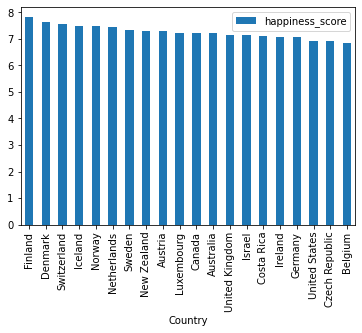

In [71]:
top_happiness.plot(x = "Country", y = "happiness_score", kind = "bar")

plt.show()

In [72]:
bottom_happiness = combined_data.nsmallest(20, ['happiness_score'])
bottom_happiness

,Country,urbanization_rate,suicide_rate,meat_consumption,gdp_per_capita,fertility,happiness_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
196,Afghanistan,26.0,6.4,17.3,2182.0,4.5,2.57,7.46,0.47,52.59,0.40,-0.10,0.93
207,South Sudan,20.2,6.1,13.1,1715.0,4.7,2.82,7.43,0.55,51.00,0.45,0.02,0.76
183,Zimbabwe,32.2,19.1,15.2,2778.0,3.6,3.30,7.87,0.76,55.62,0.71,-0.07,0.81
210,Rwanda,17.4,11.0,4.4,2642.0,4.0,3.31,7.60,0.54,61.10,0.90,0.06,0.18
86,Botswana,70.9,11.5,27.3,19388.0,2.9,3.48,9.71,0.78,58.92,0.82,-0.25,0.78
166,Central African Republic,42.2,11.6,28.0,864.0,4.7,3.48,6.63,0.32,45.20,0.64,0.08,0.89
181,Tanzania,35.2,9.6,10.0,3652.0,4.9,3.48,7.97,0.69,57.50,0.82,0.11,0.62
177,Yemen,36.6,9.8,14.7,2312.0,3.8,3.53,7.76,0.82,56.73,0.60,-0.16,0.80
211,Malawi,17.4,7.8,5.1,1292.0,4.2,3.54,7.06,0.54,57.59,0.80,0.02,0.73
182,India,34.9,16.5,5.2,9027.0,2.2,3.57,8.85,0.59,60.22,0.88,0.06,0.77


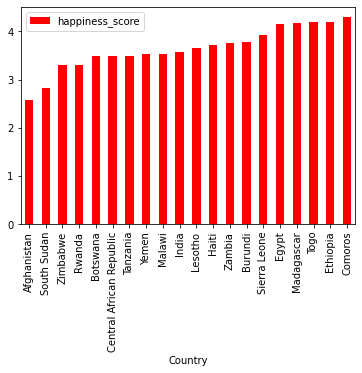

In [85]:
bottom_happiness.plot(x = "Country", y = "happiness_score", kind = "bar", color='red')

plt.show()

# GDP Per Capita

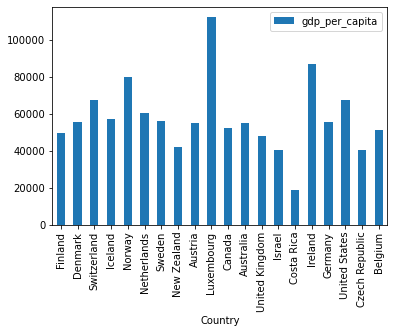

In [43]:
top_happiness.plot(x = "Country", y = "gdp_per_capita", kind = "bar")

plt.show()

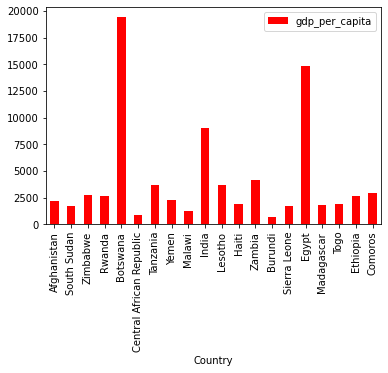

In [84]:
bottom_happiness.plot(x = "Country", y = "gdp_per_capita", kind = "bar", color='red')

plt.show()

# Urbanization Rate

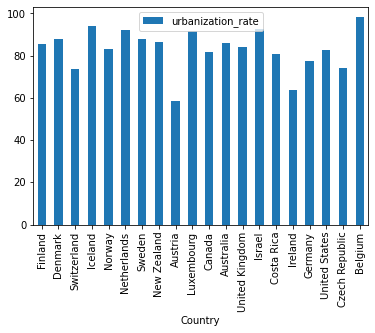

In [45]:
top_happiness.plot(x = "Country", y = "urbanization_rate", kind = "bar")

plt.show()

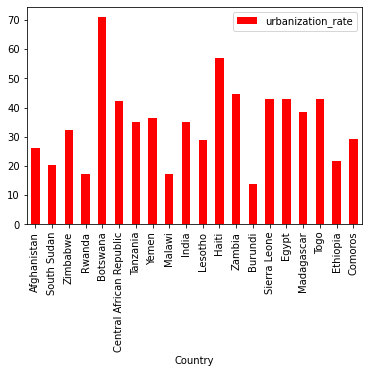

In [83]:
bottom_happiness.plot(x = "Country", y = "urbanization_rate", kind = "bar", color='red')

plt.show()

# Meat Consumption

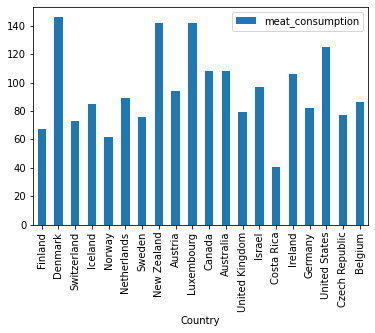

In [82]:
top_happiness.plot(x = "Country", y = "meat_consumption", kind = "bar")

plt.show()

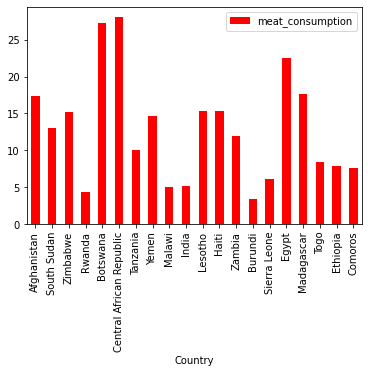

In [81]:
bottom_happiness.plot(x = "Country", y = "meat_consumption", kind = "bar", color='red')

plt.show()

# Suicide Rate

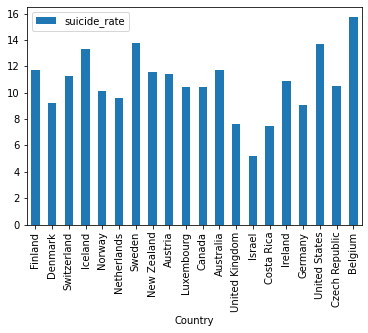

In [86]:
top_happiness.plot(x = "Country", y = "suicide_rate", kind = "bar")

plt.show()

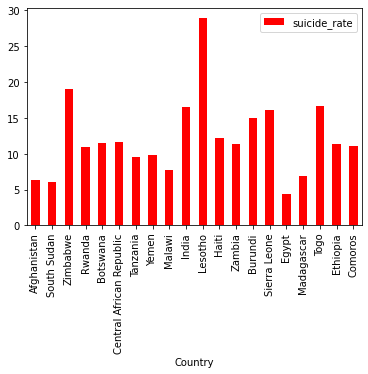

In [87]:
bottom_happiness.plot(x = "Country", y = "suicide_rate", kind = "bar", color = 'red')

plt.show()

# Fertility

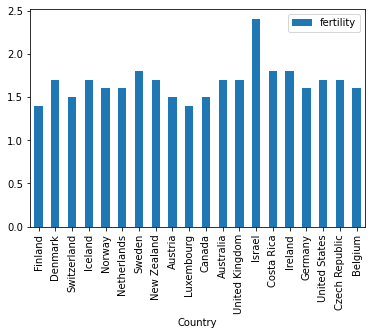

In [88]:
top_happiness.plot(x = "Country", y = "fertility", kind = "bar")

plt.show()

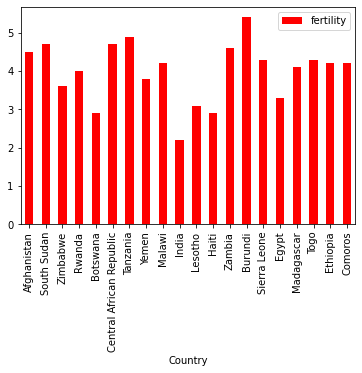

In [89]:
bottom_happiness.plot(x = "Country", y = "fertility", kind = "bar", color = 'red')

plt.show()